# Data Wrangling Project

## Data Analysis and Visualization

In [2]:
# @hidden_cell
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [50]:
df = pd.read_csv('./twitter_archive_master.csv')
df.head()

,tweet_id,full_text,name,stage,rating_ratio,created_at,retweet_count,favorite_count,source,rating_numerator,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,date,time,expanded_urls,jpg_url
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,Phineas,NaN,1.3,2017-08-01 16:23:56,8610,38858,Twitter for iPhone,13.0,...,Bagel,0.085851,False,Banana,0.076110,False,2017-08-01,16:23:56,https://twitter.com/dog_rates/status/892420643...,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg
1,892177421306343426,This is Tilly. She's just checking pup on you....,Tilly,NaN,1.3,2017-08-01 00:17:27,6324,33280,Twitter for iPhone,13.0,...,Pekinese,0.090647,True,Papillon,0.068957,True,2017-08-01,00:17:27,https://twitter.com/dog_rates/status/892177421...,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,Archie,NaN,1.2,2017-07-31 00:18:03,4195,25075,Twitter for iPhone,12.0,...,Malamute,0.078253,True,Kelpie,0.031379,True,2017-07-31,00:18:03,https://twitter.com/dog_rates/status/891815181...,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,Darla,NaN,1.3,2017-07-30 15:58:51,8723,42238,Twitter for iPhone,13.0,...,Labrador Retriever,0.168086,True,Spatula,0.040836,False,2017-07-30,15:58:51,https://twitter.com/dog_rates/status/891689557...,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg
4,891327558926688256,This is Franklin. He would like you to stop ca...,Franklin,NaN,1.2,2017-07-29 16:00:24,9489,40381,Twitter for iPhone,12.0,...,English Springer,0.225770,True,German Short-Haired Pointer,0.175219,True,2017-07-29,16:00:24,https://twitter.com/dog_rates/status/891327558...,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 25 columns):
tweet_id              1994 non-null int64
full_text             1994 non-null object
name                  1372 non-null object
stage                 326 non-null object
rating_ratio          1994 non-null float64
created_at            1994 non-null object
retweet_count         1994 non-null int64
favorite_count        1994 non-null int64
source                1994 non-null object
rating_numerator      1994 non-null float64
rating_denominator    1994 non-null float64
img_num               1994 non-null int64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null bool
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null bool
p3                    1994 non-null object
p3_conf               1994 non-null float64
p3_dog                1994 non-null 

In [23]:
df.describe()

,tweet_id,rating_ratio,retweet_count,favorite_count,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf
count,1.994000e+03,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1.994000e+03,1.994000e+03
mean,7.358508e+17,1.171228,2722.582247,8863.208124,12.280843,10.510030,1.203109,0.593941,1.344195e-01,6.024848e-02
std,6.747816e+16,4.066908,4700.808787,12582.938349,41.487125,7.261522,0.560777,0.271954,1.006807e-01,5.089067e-02
min,6.660209e+17,0.000000,13.000000,79.000000,0.000000,7.000000,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.758475e+17,1.000000,608.250000,1931.750000,10.000000,10.000000,1.000000,0.362857,5.393988e-02,1.619283e-02
50%,7.084748e+17,1.100000,1313.000000,4051.000000,11.000000,10.000000,1.000000,0.587635,1.174550e-01,4.950530e-02
75%,7.877873e+17,1.200000,3128.750000,11166.750000,12.000000,10.000000,1.000000,0.846285,1.951377e-01,9.159438e-02
max,8.924206e+17,177.600000,77488.000000,143573.000000,1776.000000,170.000000,4.000000,1.000000,4.880140e-01,2.734190e-01


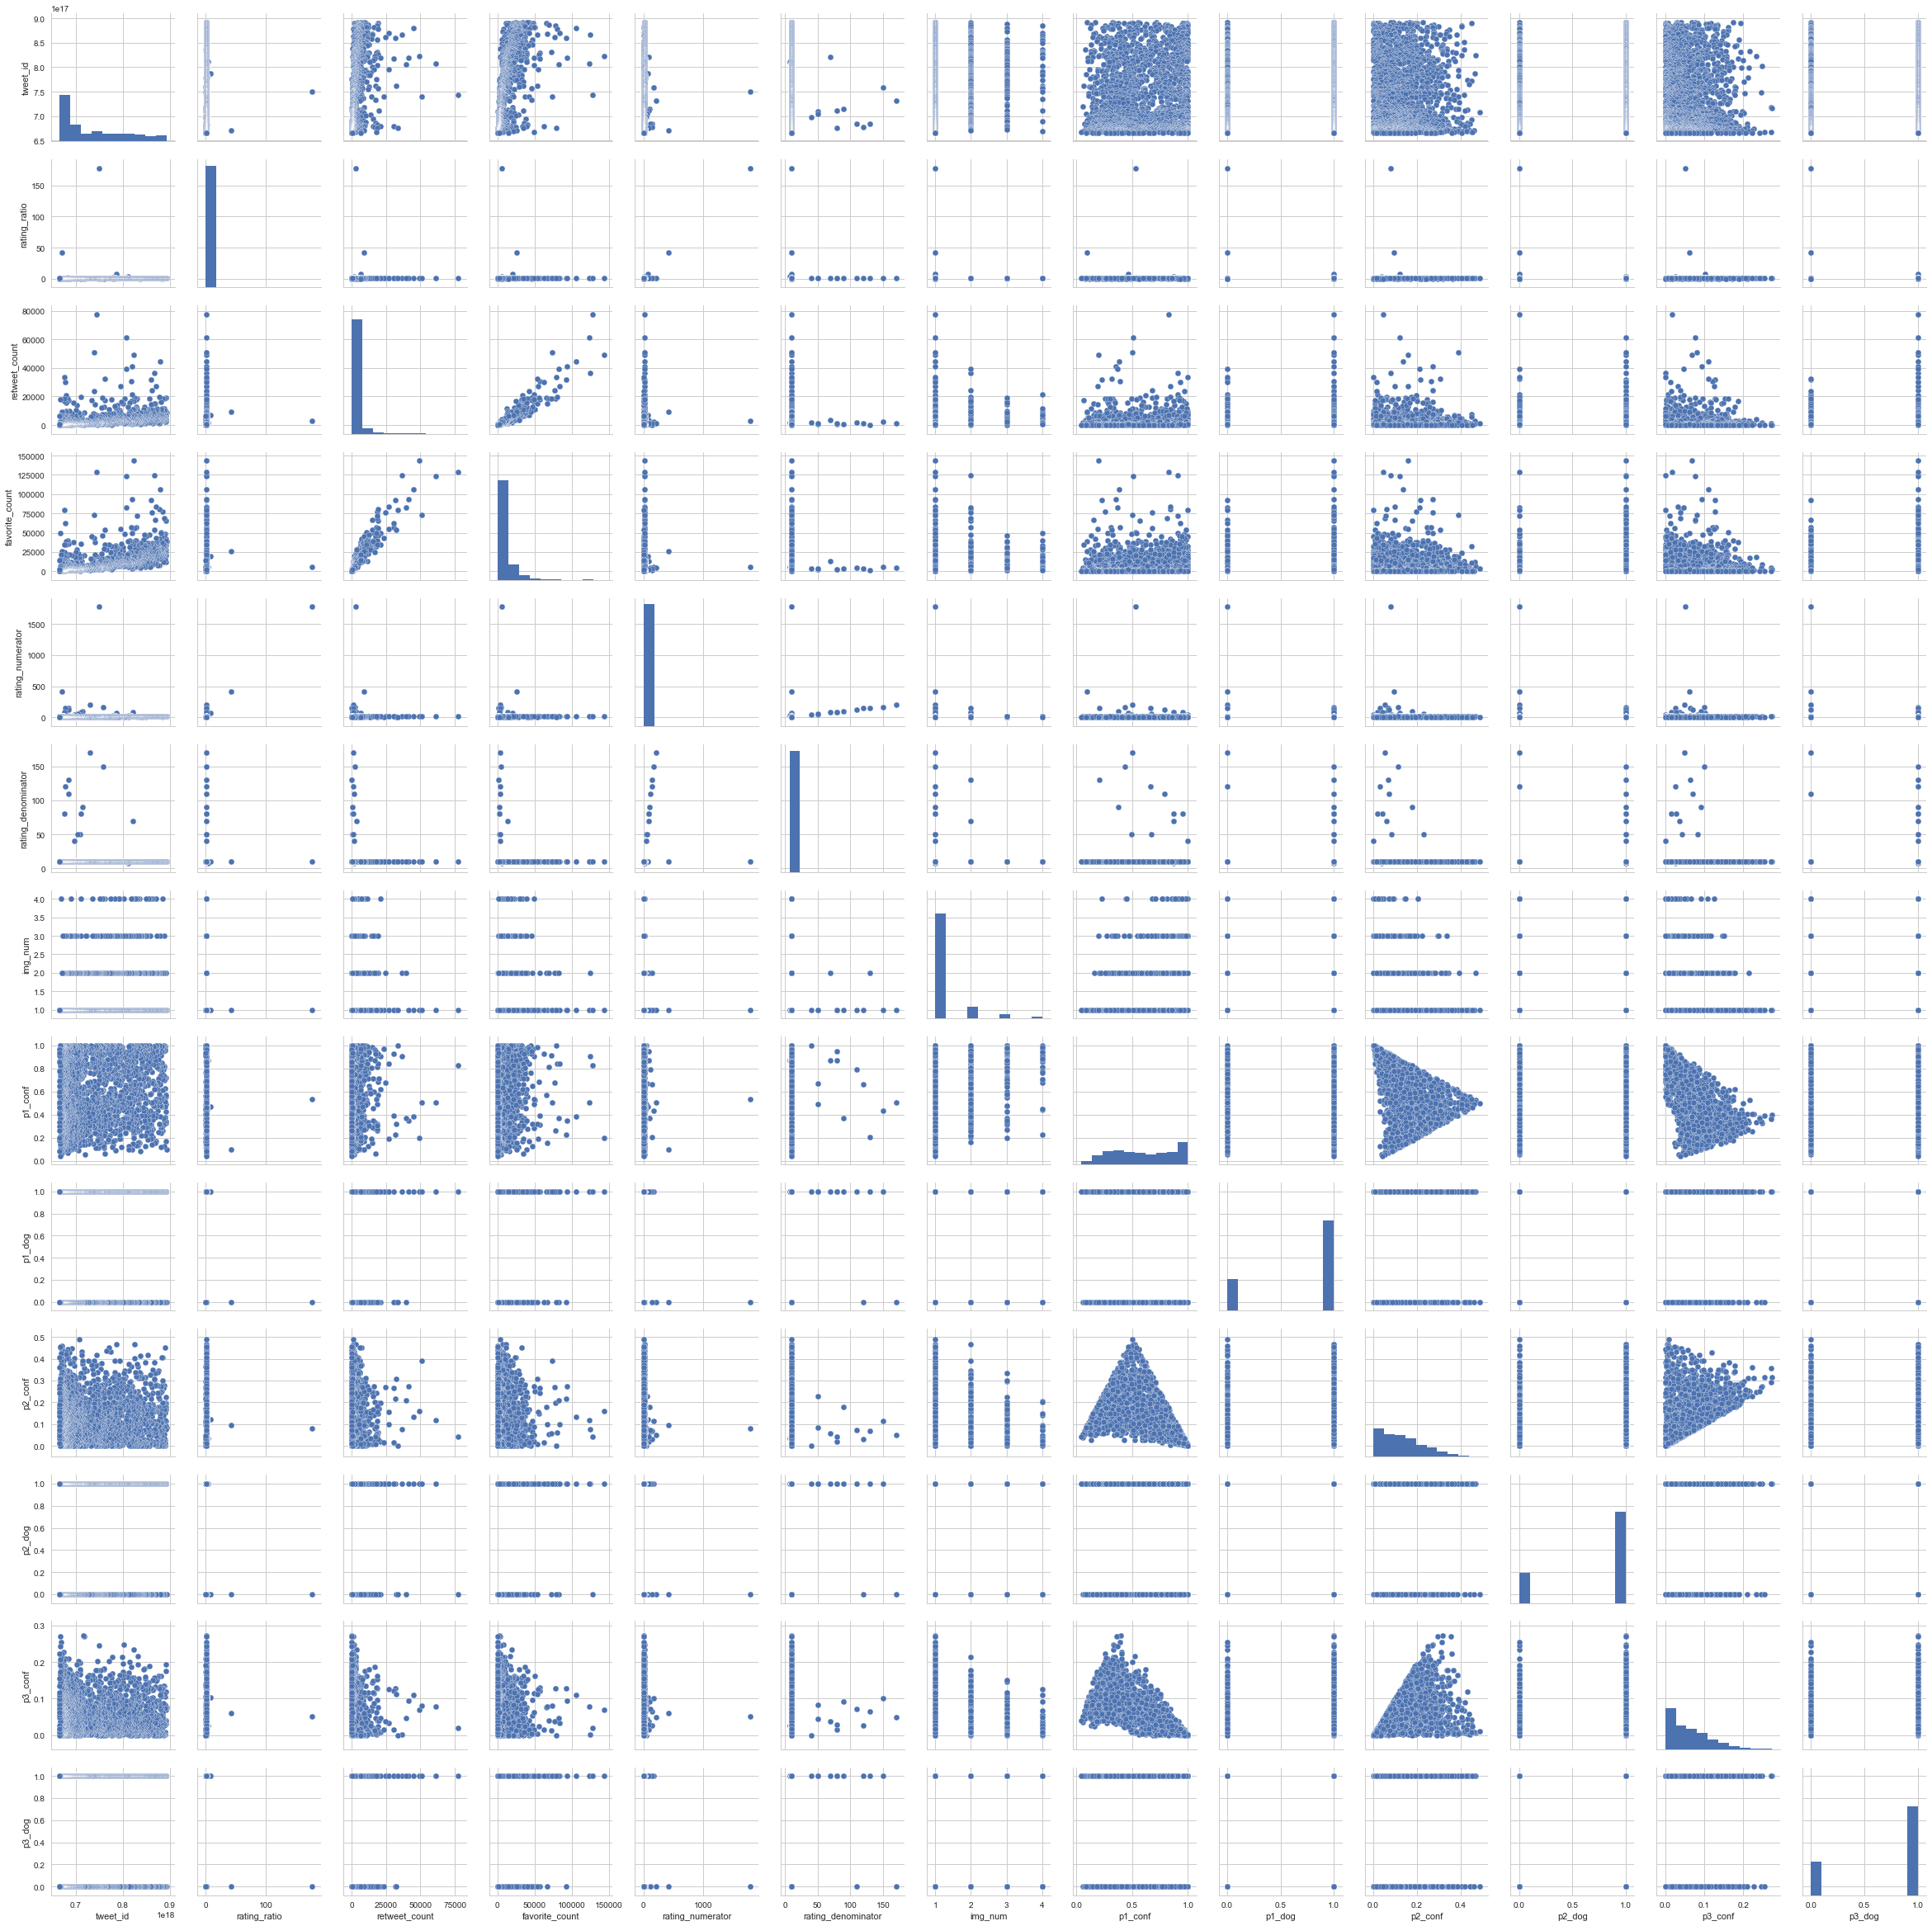

In [157]:
sns.pairplot(df);

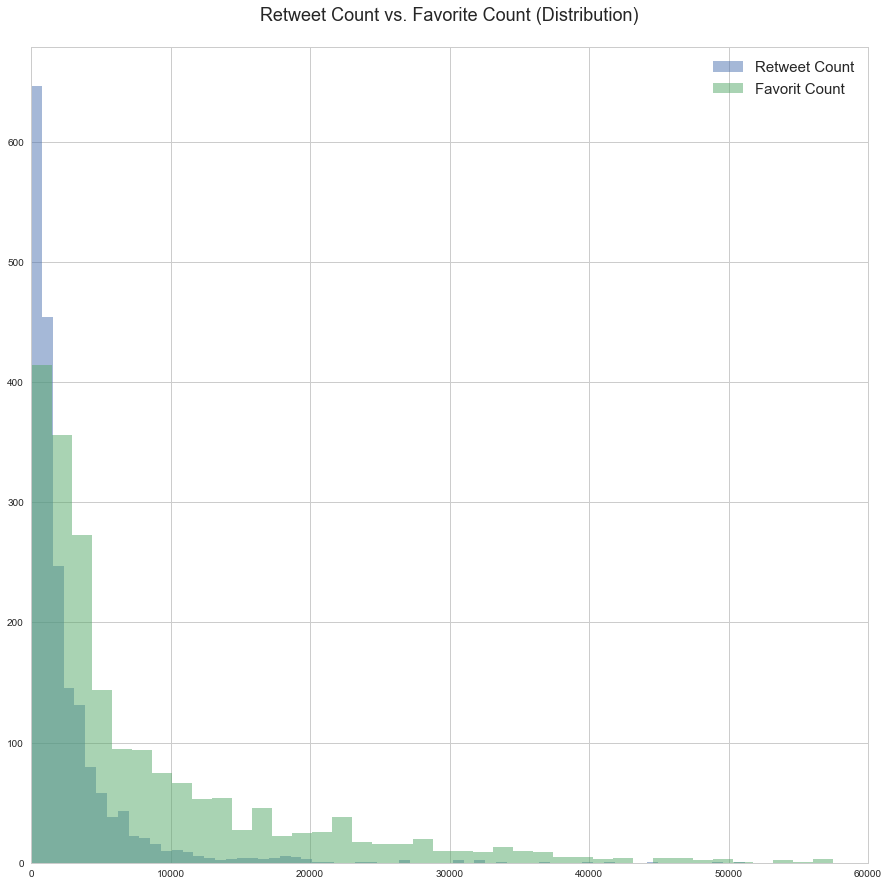

In [113]:
plt.figure(figsize=(15,15))
df.retweet_count.hist(alpha=0.5, bins=100, label='Retweet Count')
df.favorite_count.hist(alpha=0.5, bins=100, label='Favorit Count')
plt.title('Retweet Count vs. Favorite Count (Distribution)\n', size = 18)
plt.legend(loc='upper right', fontsize = 15)
plt.xlim(0,60000)
plt.show()

In [49]:
df.loc[:,['retweet_count','favorite_count']].describe()

,retweet_count,favorite_count
count,1994.000000,1994.000000
mean,2722.582247,8863.208124
std,4700.808787,12582.938349
min,13.000000,79.000000
25%,608.250000,1931.750000
50%,1313.000000,4051.000000
75%,3128.750000,11166.750000
max,77488.000000,143573.000000


Looking at the histogram above, we note that the distribution of both retweets and favorit is significantly right-skewed, however, the mean of favorite count (8863.2) is greater than retweet count (2722.6). We also note that the maximum number of favorite a tweet received was 143573, where the maximum number of retweets a tweet received was 77,488.

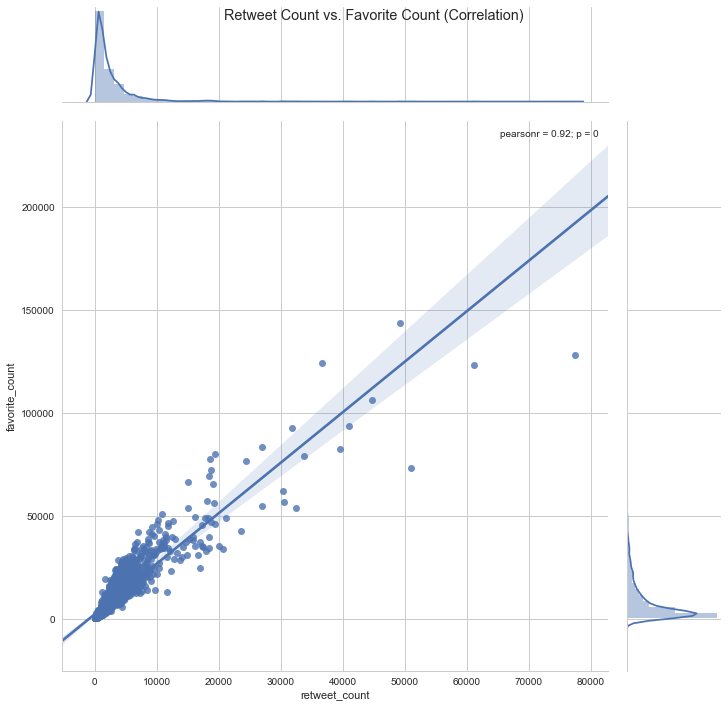

In [141]:
p = sns.jointplot(x=df.retweet_count,y=df.favorite_count, size=10, kind='reg');
p.fig.suptitle('Retweet Count vs. Favorite Count (Correlation)\n');

Looking at the plot above, we note there is a positive correlation between the favorite_count and the retweet_count. In other words, as the number of retweet increases and the number of favorites increases as well, which is expected as most people who would mark a tweet as favorite are likely to retweet that tweet.

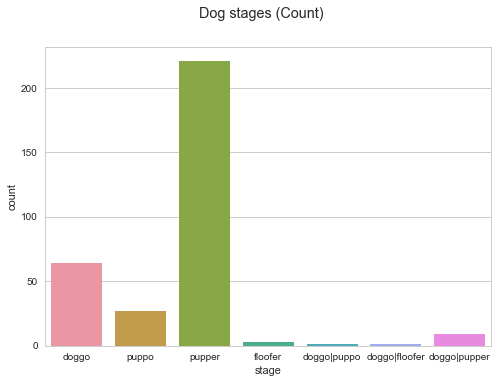

In [133]:
p = sns.countplot(data=df, x='stage')
p.figure.suptitle('Dog stages (Count)');

In [103]:
df.stage.value_counts()

pupper           221
doggo             64
puppo             27
doggo|pupper       9
floofer            3
doggo|puppo        1
doggo|floofer      1
Name: stage, dtype: int64

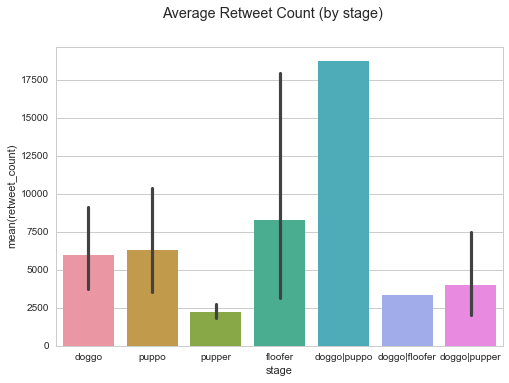

In [132]:
p=sns.barplot(data=df, x='stage', y='retweet_count')
p.figure.suptitle('Average Retweet Count (by stage)');

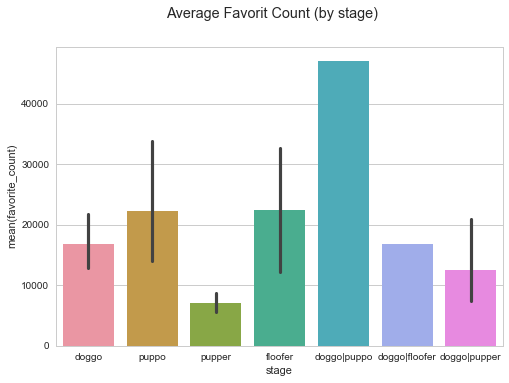

In [131]:
p=sns.barplot(data=df, x='stage', y='favorite_count')
p.figure.suptitle('Average Favorit Count (by stage)');

Looking at the plots above, we note the following:
- The pupper stage has the highest count where the (doggo|floofer) and (doggo|puppo) has the lowest count.
- The average retweet_count for (doggo|puppo) is the highest (greater than 17,500 retweets), where the average retweet_count for the pupper is the lowest (less than 2,500). 
- Similarly, the average favorite_count for (doggo|puppo) stage has the highest average favorit_count, where the pupper has the lowest average favorite count.

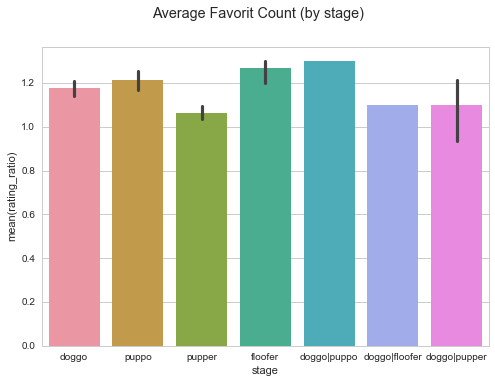

In [146]:
p=sns.barplot(data=df, x='stage', y='rating_ratio')
p.figure.suptitle('Rating (by stage)');

Looking at the plot above, we note the doggo|puppo stage has the highest average rating where the pupper stage has the lowest rating.

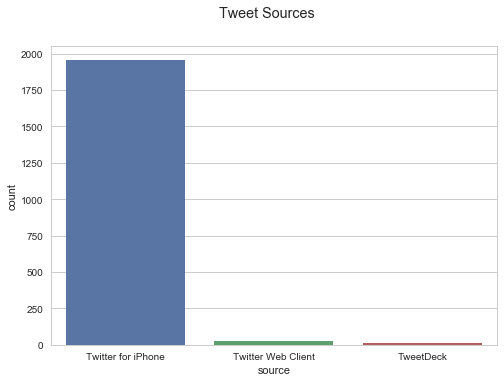

In [137]:
p = sns.countplot(data=df, x='source')
p.figure.suptitle('Tweet Sources');

In [140]:
pd.crosstab(df.source,df.stage, margins=True)

stage,doggo,doggo|floofer,doggo|pupper,doggo|puppo,floofer,pupper,puppo,All
source,,,,,,,,
TweetDeck,1,0,0,0,0,1,0,2
Twitter Web Client,1,0,0,0,0,1,0,2
Twitter for iPhone,62,1,9,1,3,219,27,322
All,64,1,9,1,3,221,27,326


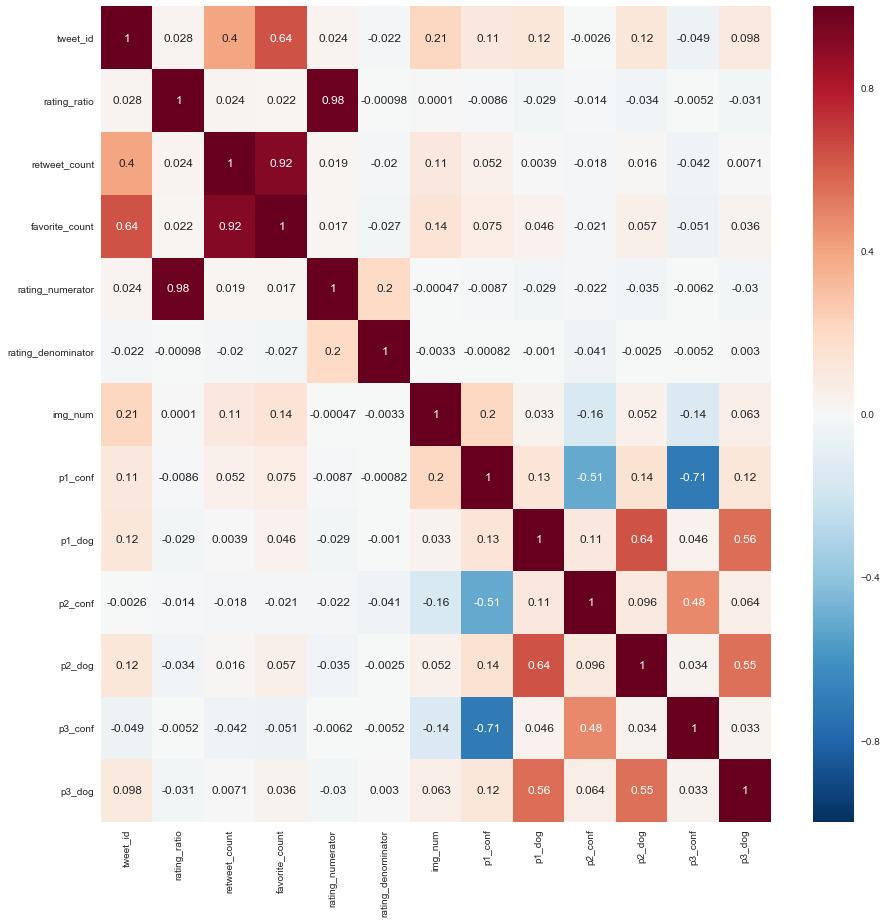

In [156]:
f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df.corr(),annot=True, ax=ax);

Looking at the heatmap above, we note the following:
- There is a strong positive correlation (0.92) between `favorit_count` and `retweet_count` which support our observation above.
- There is a strong positive correlation (0.92) between `rating_ratio` and `rating_numerator` which is given (rating_ratio is based on the rating_numerator and rating denominator)
- There is a relatively strong negative correlation (-0.71) between `p3_conf` and `p1_conf` which is interesting as different predictions may have opposing confidence levels. 